# Codigo por Christian Mateo Benietz Rojas

Librerias

In [ ]:
# Librerias
import pandas as pd
import numpy as np

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score 
import seaborn

In [ ]:
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

In [ ]:
nltk.download()

[Base de datos](https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch?select=Suicide_Detection.csv)

In [ ]:
# Cargamos la base de datos desde drive.
path = 'here your path of db'
db = pd.read_csv(path)

In [ ]:
# Eliminamos la columna Unnamed: 0
db = db.drop(columns=['Unnamed: 0'])

In [ ]:
# Sample del 70% de todos los datos.
db = db.sample(frac=.7, random_state=5)

In [ ]:
# Preparando las caracteristicas y los labels.
encoder = LabelEncoder()
y = encoder.fit_transform(db['class']) # Transformación de texto a binario.
x = db['text']

In [ ]:
y[:100] # Etiquetas binarias.

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1])

In [ ]:
x[:100] # Caracteristica.

176305    I GOT AN S/O Their name is Theo and I'm very h...
168752    I'm going to dieSo my fear of getting skin can...
123335    I’m supposed to drive to work but the door to ...
105625    Missed a year of school, what now? Since septe...
24284     I crochet a blanket for my boyfriend to say go...
                                ...                        
172463    the girl i like just said im not her type so i...
211489    I'm tired of waking up. I've missed 2 days of ...
18766     I want to dieI feel stuck and I don't want to ...
147933    I really think i'm going to do itI have destro...
57244     im so fucking tiredI don't want to live there ...
Name: text, Length: 100, dtype: object

In [ ]:
print('Informacion db')
print(f'Cantidad de muestras depresivas, suicidas: { db[db["class"] == "suicide"].shape[0] }')
print(f'Cantidad de muestras no depresivas, suicidas: { db[db["class"] == "non-suicide"].shape[0] }')
print(f'Cantidad de muestras totales: { db.shape[0] }')
print(f'Cantidad de columnas: { db.shape[1] }')
print('Cantidad de caracteristicas: 1')
print(f'Cantidad de clases: { db["class"].unique() }')

Informacion db
Cantidad de muestras depresivas, suicidas: 81175
Cantidad de muestras no depresivas, suicidas: 81277
Cantidad de muestras totales: 162452
Cantidad de columnas: 2
Cantidad de caracteristicas: 1
Cantidad de clases: ['non-suicide' 'suicide']


Lenguaje natural

In [ ]:
# Funcion que recibe un string y les elimina caracteres innecesarios y stop words. 
def stopStopWords(text, stop_words):
  # tokenized = word_tokenize(text)
  tokenized = RegexpTokenizer(r'\w+').tokenize(text)
  #Removing stop words
  filtered_sent=[]
  for w in tokenized:
    if w not in stop_words:
      filtered_sent.append(w)
  return ' '.join(filtered_sent)

In [ ]:
# Funcion que recibe una serie de pandas y limpia las stopwords.
def cleanPandasSeries(pandasSeries, stop_words):
  # Se limpian todas las cadenas de texto.
  xToquenizedWords = []
  for t in pandasSeries:
    xToquenizedWords.append(stopStopWords(t, stop_words))
  return pd.Series(xToquenizedWords)

In [ ]:
# Stop words del idioma ingles.
stop_words = stopwords.words("english")
# stop_words.append('I')

# VA A PRODUCCION.
# Funsion a produccion que limpia el string las stopwords y caracteres especiales.
def cleaningStopwords(string):
  tokenized = RegexpTokenizer(r'\w+').tokenize(string)
  filtered_sent=[]
  for w in tokenized:
    if w not in stop_words:
      filtered_sent.append(w)
  return pd.Series(' '.join(filtered_sent))

Textos de ejemplo.

In [ ]:
def extractWord(x, y, index):
  cc = 70
  word, label = x.iloc[cc], y[cc]
  cleanText = ' '.join(cleaningStopwords(word))
  print(f'Texto sucio: {len(word)} letras.\n{word}')
  print(f'\nclase: {label}')
  print(f'\nTexto limpio: {len(cleanText)} letras.\n{cleanText}')

In [ ]:
# Stop words del idioma ingles.
stop_words = stopwords.words("english")
# Stop words adicionales.
stop_words.append('I')
stop_words.append('It')
stop_words.append('The')
stop_words.append('My')
stop_words.append('One')

In [ ]:
extractWord(x, y, 50)

Texto sucio: 276 letras.
Trump is not a bad guy Have you seen what he has done made peace in a tone of places and cooled down the tensions in North Korea. He has made a ton of jobs and helped the economy. But what do I know. This will probably be taken down because it is an opinion that is unpopular.

clase: 0

Texto limpio: 158 letras.
Trump bad guy Have seen done made peace tone places cooled tensions North Korea He made ton jobs helped economy But know This probably taken opinion unpopular


In [ ]:
# Se reemplaza la informacion con los datos ya limpiados. 
x = cleanPandasSeries(x, stop_words)

In [ ]:
x[:100] # Textos limpios.

0                      GOT AN S O Their name Theo happy
1     going dieSo fear getting skin cancer head got ...
2     supposed drive work door car FROZEN SHUT BRO H...
3     Missed year school Since september till didnt ...
4     crochet blanket boyfriend say goodbyeI plannin...
                            ...                        
95    girl like said im type ive known 3 years ive w...
96    tired waking missed 2 days work past 11 years ...
97    want dieI feel stuck want disappoint anyone an...
98    really think going itI destroyed completely po...
99    im fucking tiredI want live point useless stup...
Length: 100, dtype: object

Analizando las palabras mas comunes entre las dos clases

In [ ]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [ ]:
def mostCommonWords(pandaSeries):
  allWordsTokenized = word_tokenize(''.join(pandaSeries))
  plotMostCommonWords = FreqDist(allWordsTokenized)
  return plotMostCommonWords

In [ ]:
# La cantidad de palabra repetidas entre las dos clases. Suicide, non-suicide.
most = mostCommonWords(x)

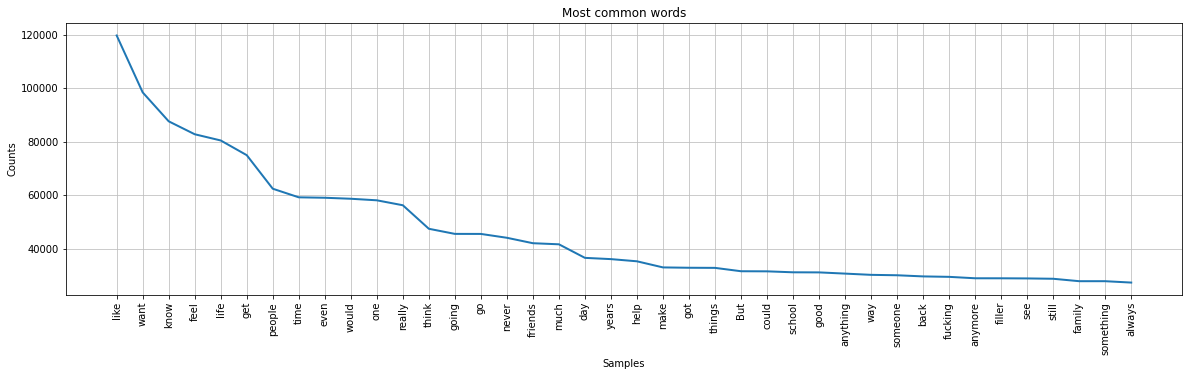

In [ ]:
plt.figure(figsize=(20, 5))
most.plot(40, title='Most common words')
plt.show()

In [ ]:
# Creamos una serie de pandas con las muestras de personas suicidas.
mostSuicideDirty = db['text'][db["class"] == "suicide"]
mostSuicideDirty

168752    I'm going to dieSo my fear of getting skin can...
24284     I crochet a blanket for my boyfriend to say go...
53267     Tired of my miserable lifeIv been suffering fr...
82769     sometimes i wish i had the strength to just en...
10262     Got back at cutting now even more deeplyTitle ...
                                ...                        
227278    why will no one talk to me.I posted something ...
7723      I never truly thought of suicide but I don't t...
30653     I think I've finally hit "rock bottom"I've bee...
169010    Mad WorldNothing is going right. But I’m still...
84040     I wanna hurt myself because I can't find a par...
Name: text, Length: 81175, dtype: object

Muestras para probar el prototipo

In [ ]:
mostSuicideDirty.iloc[658]

'I’m doing itThis is it. Good bye, good luck to all, if my parents dig this up I guess this is my suicide note-\n\nThough I never say it, I love my family more than anything. This is not your fault, I am the reason that I am the failure that I am. I am the coward who can’t face you guys and instead had to hurt you guys even more. Ily, if there’s a higher power  I’ll make sure to tell them how amazing you guys are. If not maybe in a billion years somewhere somehow there is another me who didn’t fuck up. Good bye. I’m so sorry'

In [ ]:
mostSuicideDirty.iloc[45]

'Breakup leading to thoughtsI’m 25 (m) she’s 21 (f)\n\nWe have been together almost 2 years. \n\nSunday afternoon she said she needed time to think if she’s happy. She claims I have done nothing wrong. I asked when she will be back. She said she wasn’t sure if it would be a day, week or month. I asked if we were still together and we would remain loyal and no dating or anything of the sorts. She agreed. She left and I was in agony. I felt like the world was collapsing in. I got a text the next day while I was at work saying she was at the apartment. I rushed home and held her. We get to talking asking about if things have improved. She told me she went to a friends house, and then to a co workers house. (She has no close friends). She got drunk at the co workers house and slept with him. I find out and lose it. We eventually calm down and I say that I’m willing to forgive her and if she’s willing to go to couples therapy. She agreed instantly and we just held each other. \n\nToday as I

In [ ]:
mostSuicideDirty.iloc[8899]

'Had a self harm relapse and if it wasn’t for my dog I would have ended it allI’m stupid, I just feel worthless and that I deserve to die. I got into a fight with my abusive ex and he told me that I’m dirt on the bottom of his shoe and he’s right. I’m literally sitting in a small puddle of my own blood with my razor blade and the only thing that stops me is my dog sitting next to me. I don’t know why I’m posting. I am tired of being sad all the time.'

In [ ]:
''.join(db[db['class'] == 'non-suicide'].iloc[8741])

"If I start a YouTube channel, will you guys support me? Hey, so I had a YouTube channel called Silent Snyder, where I uploaded game plays. I tried to promote it here, but was brutally shut down. I'm now thinking of renaming it as UmOkay and post Text-to-speech meme videos. What do you guys think?non-suicide"

In [ ]:
''.join(db[db['class'] == 'non-suicide'].iloc[8421])

'Anyone wanna cry and hug for a few hours? I have no particular reason. maybe we could eat some cookies together and maybe watch a movie or something?non-suicide'

In [ ]:
# Limpiamos la Serie de pandas con las muestras de personas suicidas.
mostSuicideClean = cleanPandasSeries(mostSuicideDirty, stop_words)
mostSuicideClean

0        going dieSo fear getting skin cancer head got ...
1        crochet blanket boyfriend say goodbyeI plannin...
2        Tired miserable lifeIv suffering severe depres...
3        sometimes wish strength end lifei keep telling...
4        Got back cutting even deeplyTitle says think c...
                               ...                        
81170    one talk posted something yesterday got respon...
81171    never truly thought suicide think alive 25 th ...
81172    think finally hit rock bottom taking meds past...
81173    Mad WorldNothing going right But still gonna f...
81174    wanna hurt find partnerNo recent breakup singl...
Length: 81175, dtype: object

In [ ]:
mostSuicidalWords = mostCommonWords(mostSuicideClean)

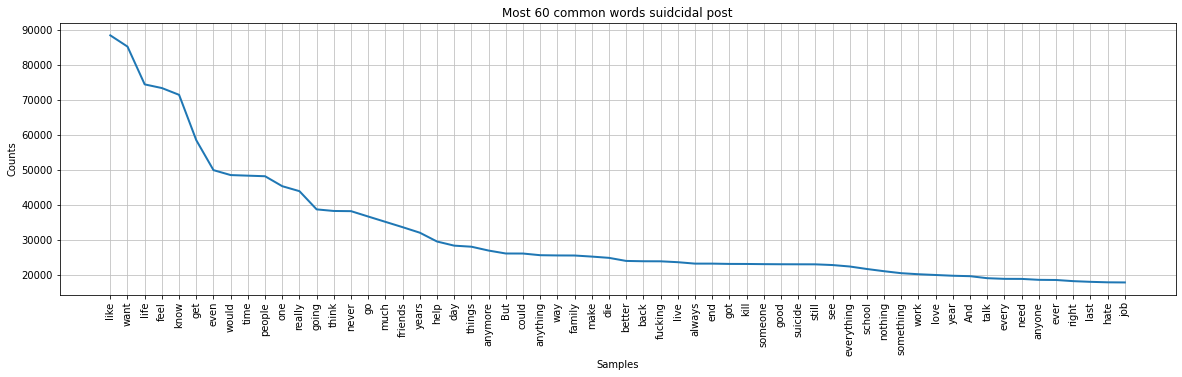

In [ ]:
plt.figure(figsize=(20, 5))
mostSuicidalWords.plot(60, title = 'Most 60 common words suidcidal post')
plt.show()

 Validacion cruzada

In [ ]:
# Train test split.
xTrain, xTest, yTrain, yTest = train_test_split(x, y)
vec = TfidfVectorizer().fit(xTrain)
xVectorized = vec.transform(xTrain)

In [ ]:
xTrain.shape, xTest.shape

((121839,), (40613,))

Con Logistic regresion

In [ ]:
# Validación cruzada de logistic regresion.
parameters = {
    'C': [0.001, 0.10, 0.1, 10, 100],
    'penalty': ['none', 'l2'],
    'solver': ['newton-cg', 'lbfgs']
}

gridLogisticRegresion = GridSearchCV(LogisticRegression(), parameters, cv=5, scoring='accuracy')

In [ ]:
# Validacion cruzada.
gridSearchLogisticRegresion = gridLogisticRegresion.fit(xVectorized, yTrain)

In [ ]:
# Resultados en un data frame de pandas.
#params = pd.DataFrame(gridSearchLogisticRegresion.cv_results_['params'])
#scores = pd.DataFrame(gridSearchLogisticRegresion.cv_results_['mean_test_score'], columns=['Accuracy'])
#results = pd.concat((params, scores), axis=1)

In [ ]:
# Imprimiendo el mejor resultado.
print(f'Best params: {gridSearchLogisticRegresion.best_params_}')
print(f'Best accuracy: {gridSearchLogisticRegresion.best_score_:.2%}')

Best params: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Best accuracy: 92.93%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.svm import SVC

Metricas

In [ ]:
# Modelo para produccion.
bestModelTrained = LogisticRegression(C= 10, penalty= 'l2', solver= 'newton-cg').fit(xVectorized, yTrain)

In [ ]:
# prediccion con los valores de test.
prediction = bestModelTrained.predict(vec.transform(xTest))

In [ ]:
# Sacamos las metricas.
accLogisticRegresion = accuracy_score(yTest, prediction)
cmLogisticRegresion = confusion_matrix(yTest, prediction)

[Text(0.5, 1.0, 'Logistic Regresion\nAccuracy score 93.88%')]

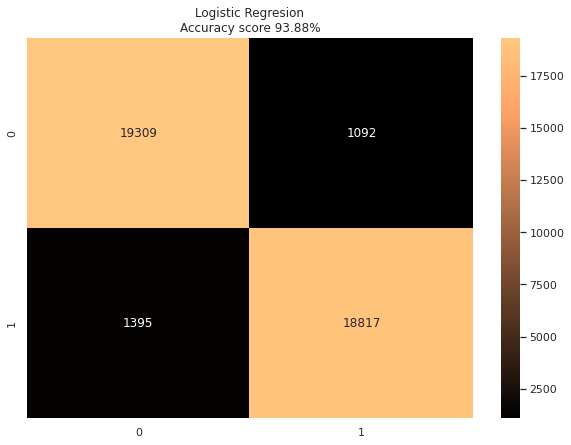

In [ ]:
seaborn.set(rc={'figure.figsize': (10, 7)})
seaborn.heatmap(cmLogisticRegresion, annot= True, fmt='g', cmap='copper').set(title= f'Logistic Regresion\nAccuracy score {accLogisticRegresion:.2%}')

Exportando modelo a produccion.

In [ ]:
# Modelo para produccion.
bestModelTrained = LogisticRegression(C= 10, penalty= 'l2', solver= 'newton-cg').fit(vec.transform(xTrain), yTrain)

In [ ]:
pickle.dump(bestModelTrained, open('nlp_model.pkl', 'wb'))
pickle.dump(vec, open('knowledgebase_vocabulary.pkl', 'wb'))

In [ ]:
pickle.dump(cleaningStopwords, open('cleaner_stopwords.pkl', 'wb'))